# Task 1 - Context

In [1]:

import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
import random
from tqdm import tqdm
import time 



# Task 2 - The Data

Dataset information

Network was collected by crawling Amazon website. It is based on Customers Who Bought This Item Also Bought feature of the Amazon website. If a product i is frequently co-purchased with product j, the graph contains an undirected edge from i to j. Each product category provided by Amazon defines each ground-truth community.

We regard each connected component in a product category as a separate ground-truth community. We remove the ground-truth communities which have less than 3 nodes. We also provide the top 5,000 communities with highest quality which are described in our paper. As for the network, we provide the largest connected component. 

## Task
- Explain the dataset itself (e.g., what do the nodes and edges represent?).
- Explain how the dataset is suitable for the project from Task 1. Show a helpful visualization of
(part of) to support your explanation.

In [2]:
#/home/generalpegasus/Documents/Programme/PorfolioExamDataMining/data/twitch/DE/musae_DE_edges.csv
file_path = Path(os.path.join('..', 'data', 'ca-GrQc.txt', 'CA-GrQc.txt'))


temporary_file = Path(os.path.join('..', 'data', 'facebook_combined.txt'))
df_graph = pd.read_csv(filepath_or_buffer=file_path, header=None, names=['from', 'to'], sep='\t', skiprows=4)
display(df_graph.head())
# Kommentar

from     to
0  3466    937
1  3466   5233
2  3466   8579
3  3466  10310
4  3466  15931

In [3]:
# file_path = Path(os.path.join('..', 'data', 'com-amazon.ungraph.txt.gz'))
# df_graph = pd.read_csv(file_path, compression='gzip', delimiter='\t', skiprows=3).rename(columns={'# FromNodeId': 'from', 'ToNodeId': 'to'})
# display(df_graph.head())

# Task 3 – IDA and Preprocessing

In [4]:
G = nx.from_pandas_edgelist(df_graph, 'from', 'to')

print(f'Number of Edges: {G.size()}')
print(f'Number of Nodes: {G.order()}')



Number of Edges: 14496
Number of Nodes: 5242


## Handshaking Lemma
The Handshaking Lemma is a fundamental rule which states for undirected graphs. 
The sum of the degree of all vertices in an undirected graph is equal to twice the number of edges.

$\sum_{v \in V} \deg(v) = 2 \cdot |E|$

The following code checks whether the graph is undirected by applying the Handshaking Lemma.

For this we first bring the graph `G` into the Adjacency Matrix


In [5]:

A = nx.adjacency_matrix(G)

print(f'Adjacency Matrix shape: \n{A.shape}\n')

print(f'Sum of the Degrees:\n{A.sum()}\n') # Summing up the degree

if A.sum() == 2*G.size():
    print('The Handshake Lemma holds')
else:
    print('The Handshake Lemma does not hold ')


Adjacency Matrix shape: 
(5242, 5242)

Sum of the Degrees:
28980

The Handshake Lemma does not hold 


## Basic Properties 



In [6]:
# # draw Grpah
# plt.figure(figsize=(15, 15))
# pos = nx.spring_layout(G, seed=42)
# nx.draw(G, pos=pos, with_labels=True, node_color='skyblue', node_size=200, edge_color='gray')
# plt.title("Graph G")
# plt.show()

### Degree Distribution
The degree distribution show the frequency of degrees. How often occur a number of degrees of a graph. 

### CCRF
The Complementary Cumulative Relative Frequency (CCRF) of Degrees is a statistical representation that shows the proportion of nodes in a graph whose degree is greater than or equal to a given value.

In [7]:
def basic_graph_properties(G):


    graph_properties = {
        'Number of nodes': G.number_of_nodes(),
        'Number of edges': G.number_of_edges(),
        'Density': nx.density(G),
        'Is undirected graph': not nx.is_directed(G),
        'Is connected':nx.is_connected(G)
    }

    if not nx.is_directed(G):
        graph_properties['Number of connected components'] = nx.number_connected_components(G)
        largest_cc = max(nx.connected_components(G), key=len)
        graph_properties['Size of largest connected component'] = len(largest_cc)

    graph_properties['Average cluster coefficient'] = nx.average_clustering(G)
    return graph_properties


In [8]:
def degree_distribution(G):
    

    # Degree distribution
    degrees = [d for _, d in G.degree()]
    #degree_hist = np.histogram(degrees, bins=range(min(degrees), max(degrees) + 1))

    # CCDF
    degree_counts = np.bincount(degrees)
    ccdf = 1.0 - np.cumsum(degree_counts) / sum(degree_counts)

    # Plot
    plt.figure(figsize=(12, 6))

    # Degree Distribution
    plt.subplot(1, 2, 1)
    plt.hist(degrees, bins=30, edgecolor="k")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.title("Degree Distribution")

    # CCDF
    plt.subplot(1, 2, 2)
    plt.plot(range(len(ccdf)), ccdf, marker="o", linestyle="none")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Degree (log scale)")
    plt.ylabel("CCDF (log scale)")
    plt.title("Complementary Cumulative Distribution Function")

    plt.tight_layout()
    plt.show()


Degree Distribution before preprocessing:



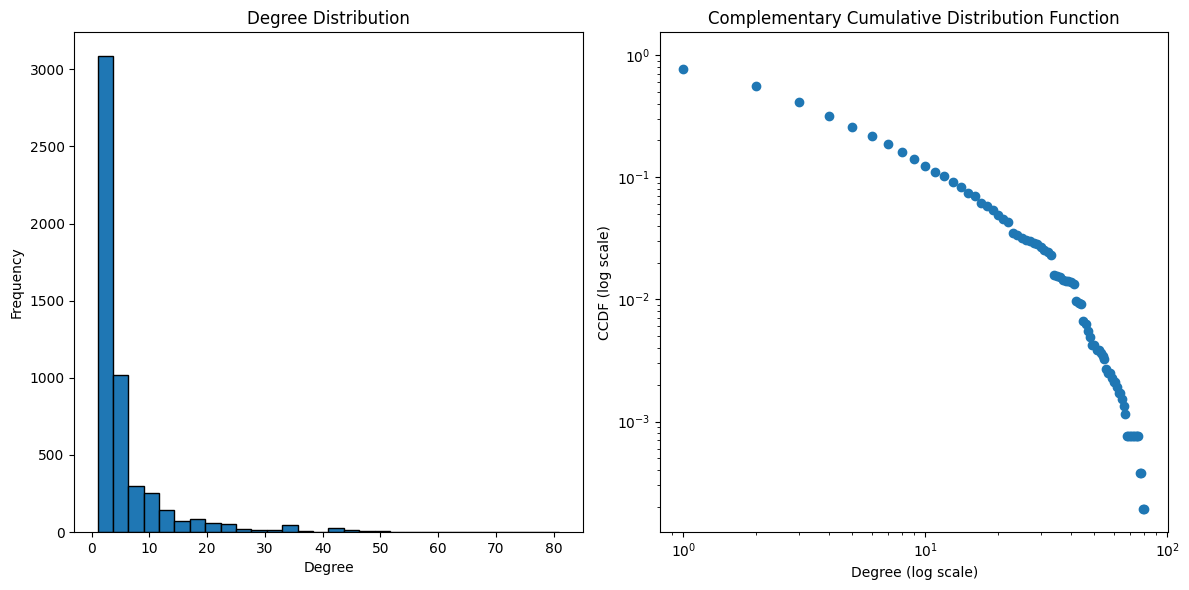

Degree Distribution after preprocessing:



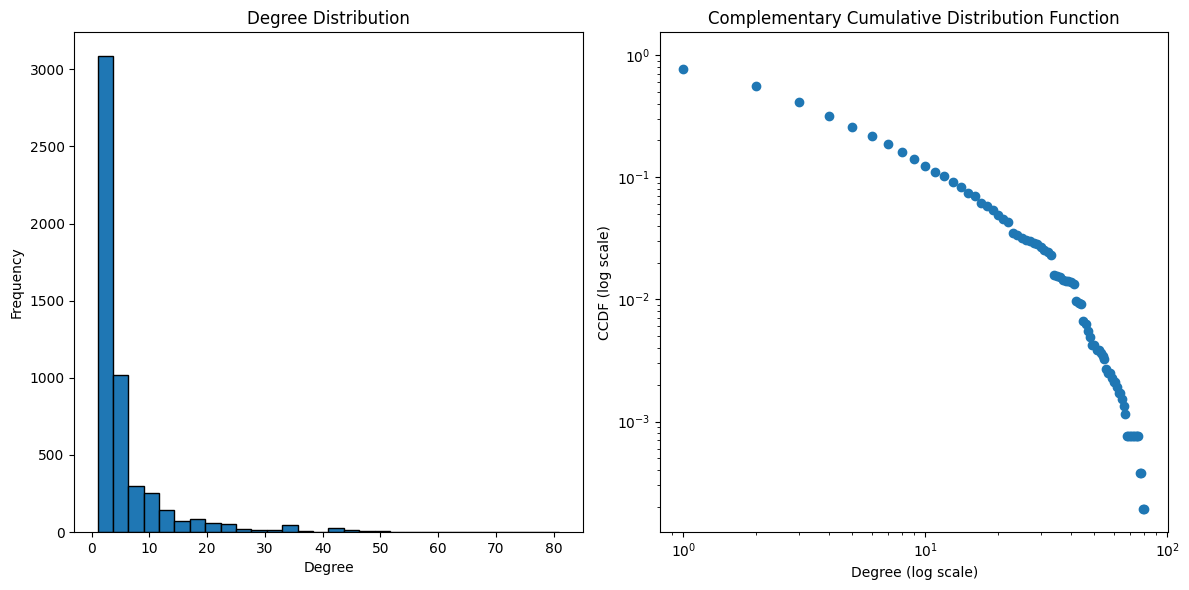

Before Processing After Processing
Number of nodes                                  5242             5242
Number of edges                                 14496            14496
Density                                      0.001055         0.001055
Is undirected graph                              True             True
Is connected                                    False            False
Number of connected components                    355              355
Size of largest connected component              4158             4158
Average cluster coefficient                  0.529636         0.529636

In [9]:
def preprocessing(G):
    # Preprocessing examples
    G = nx.Graph(G)  # Convert to undirected (if necessary)
    

    # Optionally filter by degree
    # degree_threshold = np.mean([d for n, d in G.degree()])
    # low_degree_nodes = [n for n, d in G.degree() if d < degree_threshold]

    # G.remove_nodes_from(low_degree_nodes)
    #G.remove_edges_from(nx.selfloop_edges(G))  # Remove self-loops
   # G.remove_nodes_from(list(nx.isolates(G)))  # Remove isolated nodes
    return G

G_new = preprocessing(G)


print("Degree Distribution before preprocessing:\n")
degree_distribution(G)
print("Degree Distribution after preprocessing:\n")
degree_distribution(G_new)
basic_graph_properties(G_new)
display(pd.DataFrame({'Before Processing': basic_graph_properties(G),
                      'After Processing': basic_graph_properties(G_new)}))


# Task 4 – Graph Properties

## Explaination

**Number of nodes:**

Number of nodes is the number of Persons in the Network

**Number of edges:**

Number of Edges are the number of cennections in a Network

**Node with highest degree:**
The Node which has the highest number of connections


**Node with highest betweenness:**
...

---


**Average degree:**
...

---

**Max degree:**
...

---

**Number of connected components:**
...

---

**Transitivity:**

The Transitivity (Global Clustering Coefficient) is defined as the ratio of the number of closed triplets (triangles) to the total number of connected triplets of nodes in the graph. In sozial Networks: How many friends share the same friends as you do.

Let $(a_{a,v})_{u,v \in V}$ be the adjacency matrix of Graph G

transitivity of G is the fraction of closed triplets (3 nodes connected by three edges) among all dyads (three nodes connected by at least two edges)

$\frac{ \sum_{u,v,w \in V} a_{u,v} a_{v,w} a_{w,u} }{ \sum_{v \in V} deg(v) \cdot (deg(v) - 1) }$


0: No clustering (no triangles in the graph).

1: Perfect clustering (every possible triplet forms a triangle, as in a complete graph)

---

**Density:**

The [density](https://en.wikipedia.org/wiki/Dense_graph) of an undirected graph measures how "completet" the graph is. Its a measure of how many edges a graph has to the maximum possible number of edges. 
Complete graphs have a density D = 1 and a graph with no edges (empty graph) is D = 0.

Density is defined as:

$D = \frac{2 \cdot |E|}{|V|(|V|-1)}$

with:
- |E|: Number of edges
- |V|: Number of Nodes

**Diameter:**

The length of the longest shortest path in a graph is called the **diameter** of the graph.

**Average shortest path length:**

How quckly can information spread through the graph

**Efficiency:**

Is the average of the inverse shortest path lengths between to pairs of nodes. It measures how "efficient" the graph is in terms of connectivity and accessibility.


Erdős–Rényi random graph model with fix number of nodes and number of edges

In [10]:
G = G_new.copy()

In [ ]:
def compute_properties(G):
    properties = {
        "Number of nodes": G.number_of_nodes(),
        "Number of edges": G.number_of_edges(),
        "Node with highest degree": max(dict(G.degree()), key=lambda x: G.degree[x]),
        "Node with highest betweenness": max(nx.betweenness_centrality(G).items(), key=lambda x: x[1])[0],
        "Average degree": sum(dict(G.degree()).values()) / G.number_of_nodes(),
        "Max degree": max(dict(G.degree()).values()),
        #"Density": nx.density(G),
        "Number of connected components": nx.number_connected_components(G) if not G.is_directed() else "N/A",
        #"Diameter": nx.diameter(G) if nx.is_connected(G) else "Graph not connected",
        #"Average Shortest Path Length": nx.average_shortest_path_length(G) if nx.is_connected(G) else "Graph not connected",
        #"Efficiency": nx.global_efficiency(G),
        #"Transitivity": nx.transitivity(G),
        "Average Clustering Coefficient": nx.average_clustering(G),
        #"Assortativity": nx.degree_assortativity_coefficient(G),
    }
    return properties


start_time = time.time()
# Properties of G
properties_G = compute_properties(G)
end_time = time.time()
print(f'Time to compute properties for graph G: {end_time - start_time}')

# Erdős–Rényi Random Graphs   
random_properties_list = []

# Compute graph properties for different random Erdős–Rényi graphs with 10 different seeds
for seed in tqdm(range(10)):
    random_graph = nx.gnm_random_graph(n=G.number_of_nodes(), m=G.number_of_edges(), seed=seed)
    random_properties = compute_properties(random_graph)
    random_properties_list.append(random_properties)  

# Compute averages of random graph properties
random_properties_avg = pd.DataFrame(random_properties_list).mean().to_dict()

# Compare properties
comparison = pd.DataFrame({"G Graph": properties_G, "Erdős-Rényi Avg": random_properties_avg})
display(comparison)


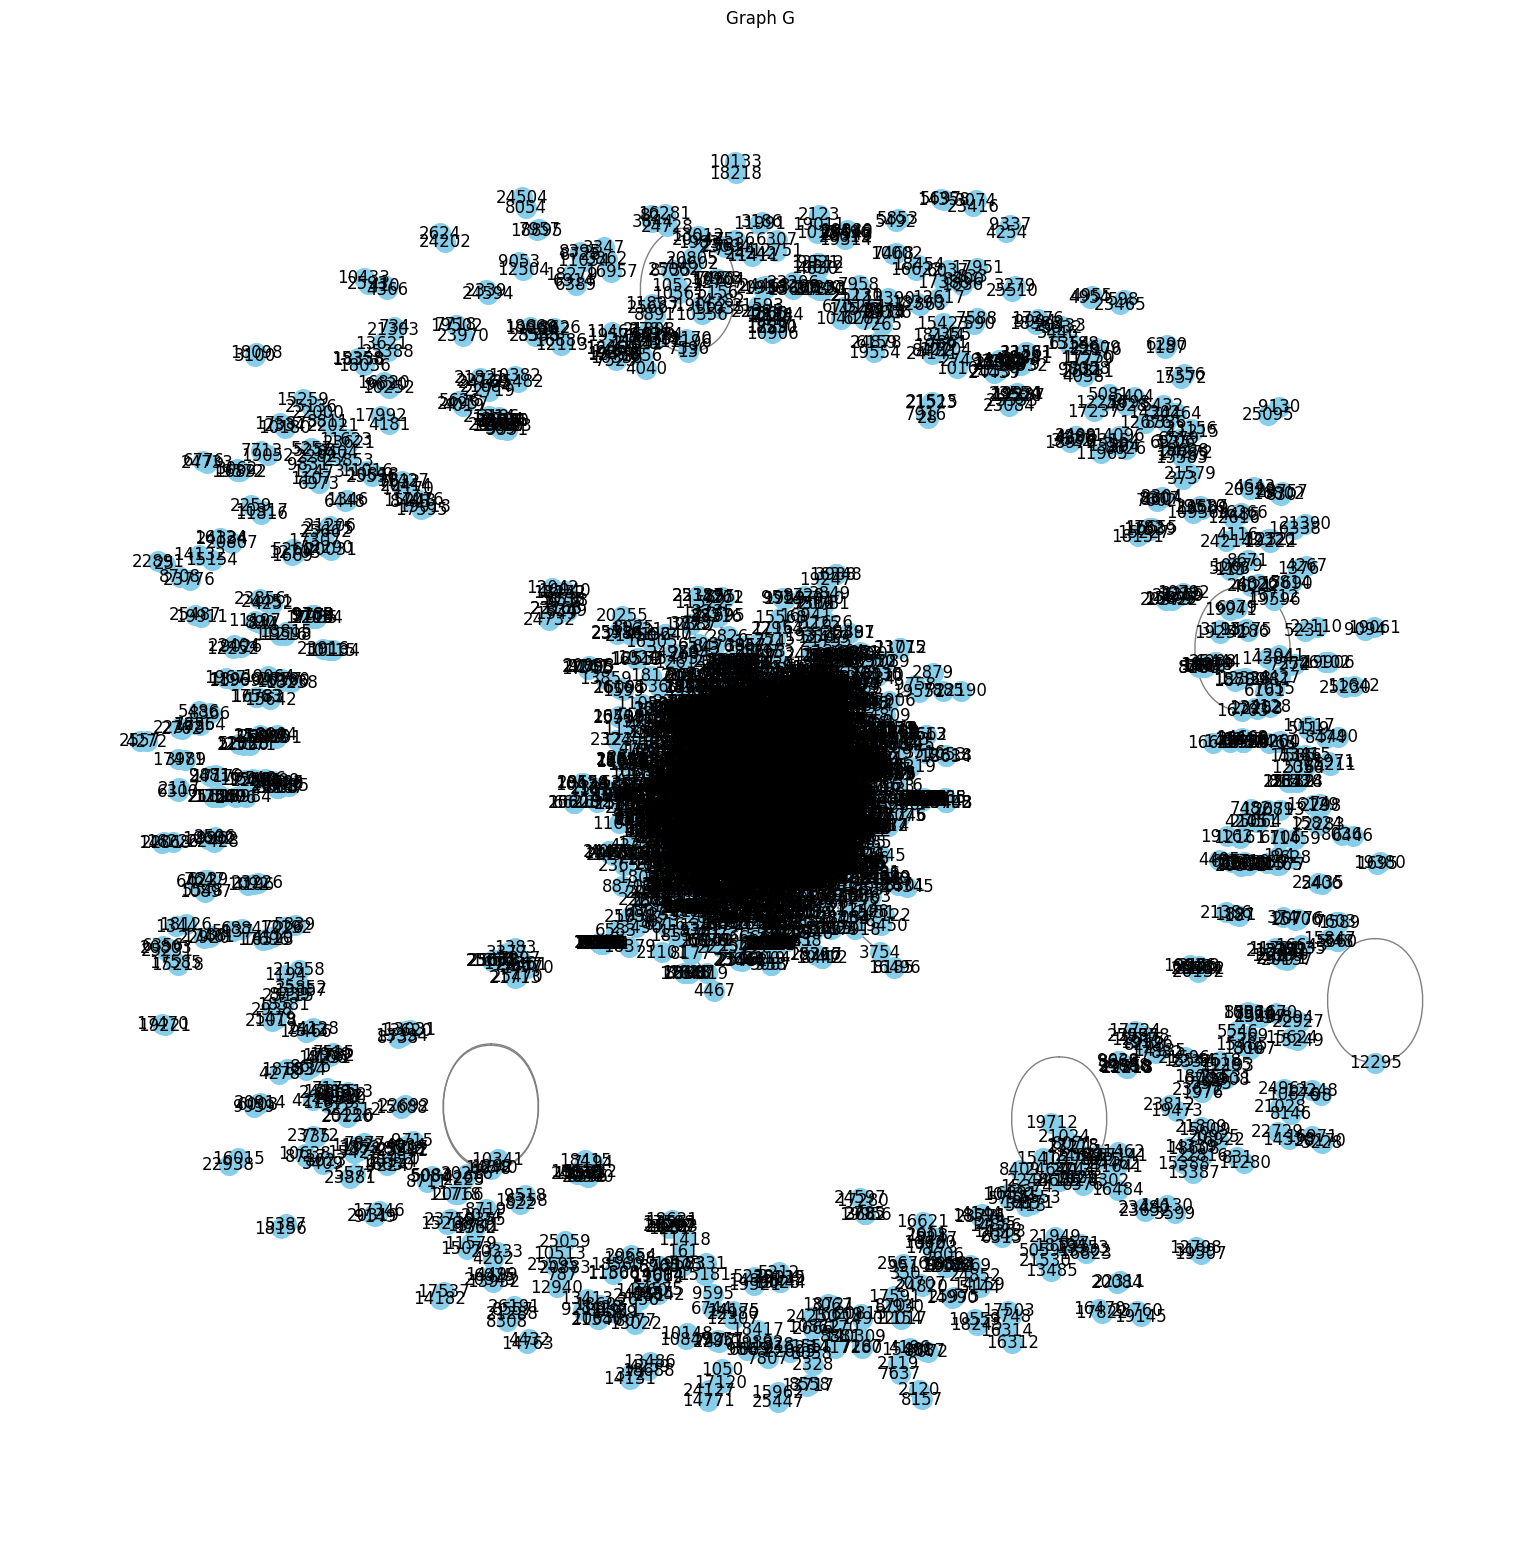

In [12]:
# draw Grpah
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos=pos, with_labels=True, node_color='skyblue', node_size=200, edge_color='gray')
plt.title("Graph G")
plt.show()

# Task 5 – Central Nodes

## Explaination of the Centralities

More information about the centrality measures can be found [here](https://www.sciencedirect.com/topics/computer-science/degree-centrality#:~:text=The%20degree%20centrality%20of%20a,high%20centrality%20by%20other%20measures.).

**Degree Centrality:** 

Measures the importance of a node in a network based on the number of direct connections (edges) it has. It reflects the local influence of a node in the graph by simply counting its neighbors. Higher degree centrality means that the node is more central.

$$
C_d(v) = \frac{deg(v)}{|V| - 1}
$$

where:
- $deg(v)$: Is the number of edges connected to the node $v$
- $|V|: Total number of nodes in the graph$

**Betweenness Centrality:**

Measures the importance of a node by quantifying how often it acts as a bridge along the shortest paths between other nodes in a graph. It identifies nodes that have significant control over the flow of information or resources in the network. High betweenness centrality means that a node is cucial in the connections between many other nodes. Nodes with a high betweenness are often called gate keepers.

$$
C_B(v) = \sum_{s \neq v \neq t} \frac{\sigma_{st}(v)}{\sigma_{st}}
$$

where:
- $\sigma_{st}$: The number of shortest paths from node $s$ to node $t$
- $\sigma_{st}(v)$: The number of shortest paths from node $s$ to node $t$ that pass through node $v$




In [13]:


# Compute the centralities of nodes
centrality_df = pd.DataFrame({
    'Node': list(G.nodes),
    'Degree Centrality': nx.degree_centrality(G).values(),
    'Betweenness Centrality': nx.betweenness_centrality(G).values(),
    'Closeness Centrality': nx.closeness_centrality(G).values(),
    'Eigenvector Centrality': nx.eigenvector_centrality(G).values(),
    'PageRank': nx.pagerank(G).values()
})


# Calculate the rank of the centralities. Ascending False that the highest centralitie measure has rank 1
centrality_df['Degree Centrality Rank'] = centrality_df['Degree Centrality'].rank(ascending=False)
centrality_df['Betweenness Centrality Rank'] = centrality_df['Betweenness Centrality'].rank(ascending=False)
centrality_df['Closeness Centrality Rank'] = centrality_df['Closeness Centrality'].rank(ascending=False)
centrality_df['Eigenvector Centrality Rank'] = centrality_df['Eigenvector Centrality'].rank(ascending=False)
centrality_df['PageRank Rank'] = centrality_df['PageRank'].rank(ascending=False)


for col in ['Degree Centrality Rank', 'Betweenness Centrality Rank', 'Closeness Centrality Rank', 'Eigenvector Centrality Rank', 'PageRank Rank']:
    display(centrality_df.nsmallest(n=5, columns=[col]))



Node  Degree Centrality  Betweenness Centrality  Closeness Centrality  \
101  21012           0.015455                0.011649              0.186546   
295  21281           0.015073                0.009643              0.178778   
103  22691           0.014692                0.009777              0.184759   
279  12365           0.014692                0.011229              0.185309   
72    6610           0.012975                0.012767              0.182075   

     Eigenvector Centrality  PageRank  Degree Centrality Rank  \
101                0.155561  0.001069                     1.0   
295                0.147963  0.001153                     2.0   
103                0.147038  0.001082                     3.5   
279                0.153072  0.001034                     3.5   
72                 0.146743  0.000909                     5.5   

     Betweenness Centrality Rank  Closeness Centrality Rank  \
101                         36.0                        6.0   
295                         58.0                       30.0   
103                         56.0                       10.0   
279                         42.0                        9.0   
72                          30.0                       18.0   

     Eigenvector Centrality Rank  PageRank Rank  
101                          1.0           10.0  
295                         13.0            6.0  
103                         15.0            8.0  
279                          3.0           11.0  
72                          16.0           21.0

Node  Degree Centrality  Betweenness Centrality  Closeness Centrality  \
1037  13801           0.008586                0.037027              0.194285   
11     9572           0.006487                0.025689              0.189038   
207   14599           0.005724                0.025488              0.177977   
53     7689           0.006106                0.024971              0.183484   
577   13929           0.008586                0.024653              0.181534   

      Eigenvector Centrality  PageRank  Degree Centrality Rank  \
1037                0.003599  0.001342                    42.0   
11                  0.003370  0.001173                   102.0   
207                 0.000025  0.000908                   145.5   
53                  0.000105  0.001096                   131.0   
577                 0.000404  0.001305                    42.0   

      Betweenness Centrality Rank  Closeness Centrality Rank  \
1037                          1.0                        1.0   
11                            2.0                        3.0   
207                           3.0                       39.0   
53                            4.0                       13.0   
577                           5.0                       20.0   

      Eigenvector Centrality Rank  PageRank Rank  
1037                        190.0            2.0  
11                          220.0            4.0  
207                         946.0           22.0  
53                          667.0            7.0  
577                         399.0            3.0

Node  Degree Centrality  Betweenness Centrality  Closeness Centrality  \
1037  13801           0.008586                0.037027              0.194285   
147   14485           0.004007                0.023503              0.189538   
11     9572           0.006487                0.025689              0.189038   
288   17655           0.012593                0.017999              0.188962   
244    2654           0.007251                0.016997              0.187129   

      Eigenvector Centrality  PageRank  Degree Centrality Rank  \
1037                0.003599  0.001342                    42.0   
147                 0.001485  0.000615                   247.5   
11                  0.003370  0.001173                   102.0   
288                 0.148260  0.000897                     8.0   
244                 0.004970  0.000784                    75.0   

      Betweenness Centrality Rank  Closeness Centrality Rank  \
1037                          1.0                        1.0   
147                           7.0                        2.0   
11                            2.0                        3.0   
288                          10.0                        4.0   
244                          12.0                        5.0   

      Eigenvector Centrality Rank  PageRank Rank  
1037                        190.0            2.0  
147                         254.0          103.0  
11                          220.0            4.0  
288                          12.0           23.0  
244                         144.0           37.0

Node  Degree Centrality  Betweenness Centrality  Closeness Centrality  \
101  21012           0.015455                0.011649              0.186546   
265   2741           0.012402                0.005866              0.183668   
279  12365           0.014692                0.011229              0.185309   
296  21508           0.012784                0.003228              0.177412   
77    9785           0.012975                0.007255              0.178208   

     Eigenvector Centrality  PageRank  Degree Centrality Rank  \
101                0.155561  0.001069                     1.0   
265                0.153574  0.000774                     9.0   
279                0.153072  0.001034                     3.5   
296                0.151194  0.000824                     7.0   
77                 0.150903  0.000808                     5.5   

     Betweenness Centrality Rank  Closeness Centrality Rank  \
101                         36.0                        6.0   
265                        125.0                       12.0   
279                         42.0                        9.0   
296                        271.0                       45.0   
77                          85.0                       36.0   

     Eigenvector Centrality Rank  PageRank Rank  
101                          1.0           10.0  
265                          2.0           41.0  
279                          3.0           11.0  
296                          4.0           30.0  
77                           5.0           35.0

Node  Degree Centrality  Betweenness Centrality  Closeness Centrality  \
108   14265           0.007060                0.019731              0.170716   
1037  13801           0.008586                0.037027              0.194285   
577   13929           0.008586                0.024653              0.181534   
11     9572           0.006487                0.025689              0.189038   
186    2710           0.006297                0.022355              0.176870   

      Eigenvector Centrality  PageRank  Degree Centrality Rank  \
108                 0.000129  0.001449                    78.0   
1037                0.003599  0.001342                    42.0   
577                 0.000404  0.001305                    42.0   
11                  0.003370  0.001173                   102.0   
186                 0.000008  0.001153                   125.0   

      Betweenness Centrality Rank  Closeness Centrality Rank  \
108                           9.0                      126.0   
1037                          1.0                        1.0   
577                           5.0                       20.0   
11                            2.0                        3.0   
186                           8.0                       48.0   

      Eigenvector Centrality Rank  PageRank Rank  
108                         619.0            1.0  
1037                        190.0            2.0  
577                         399.0            3.0  
11                          220.0            4.0  
186                        1301.0            5.0

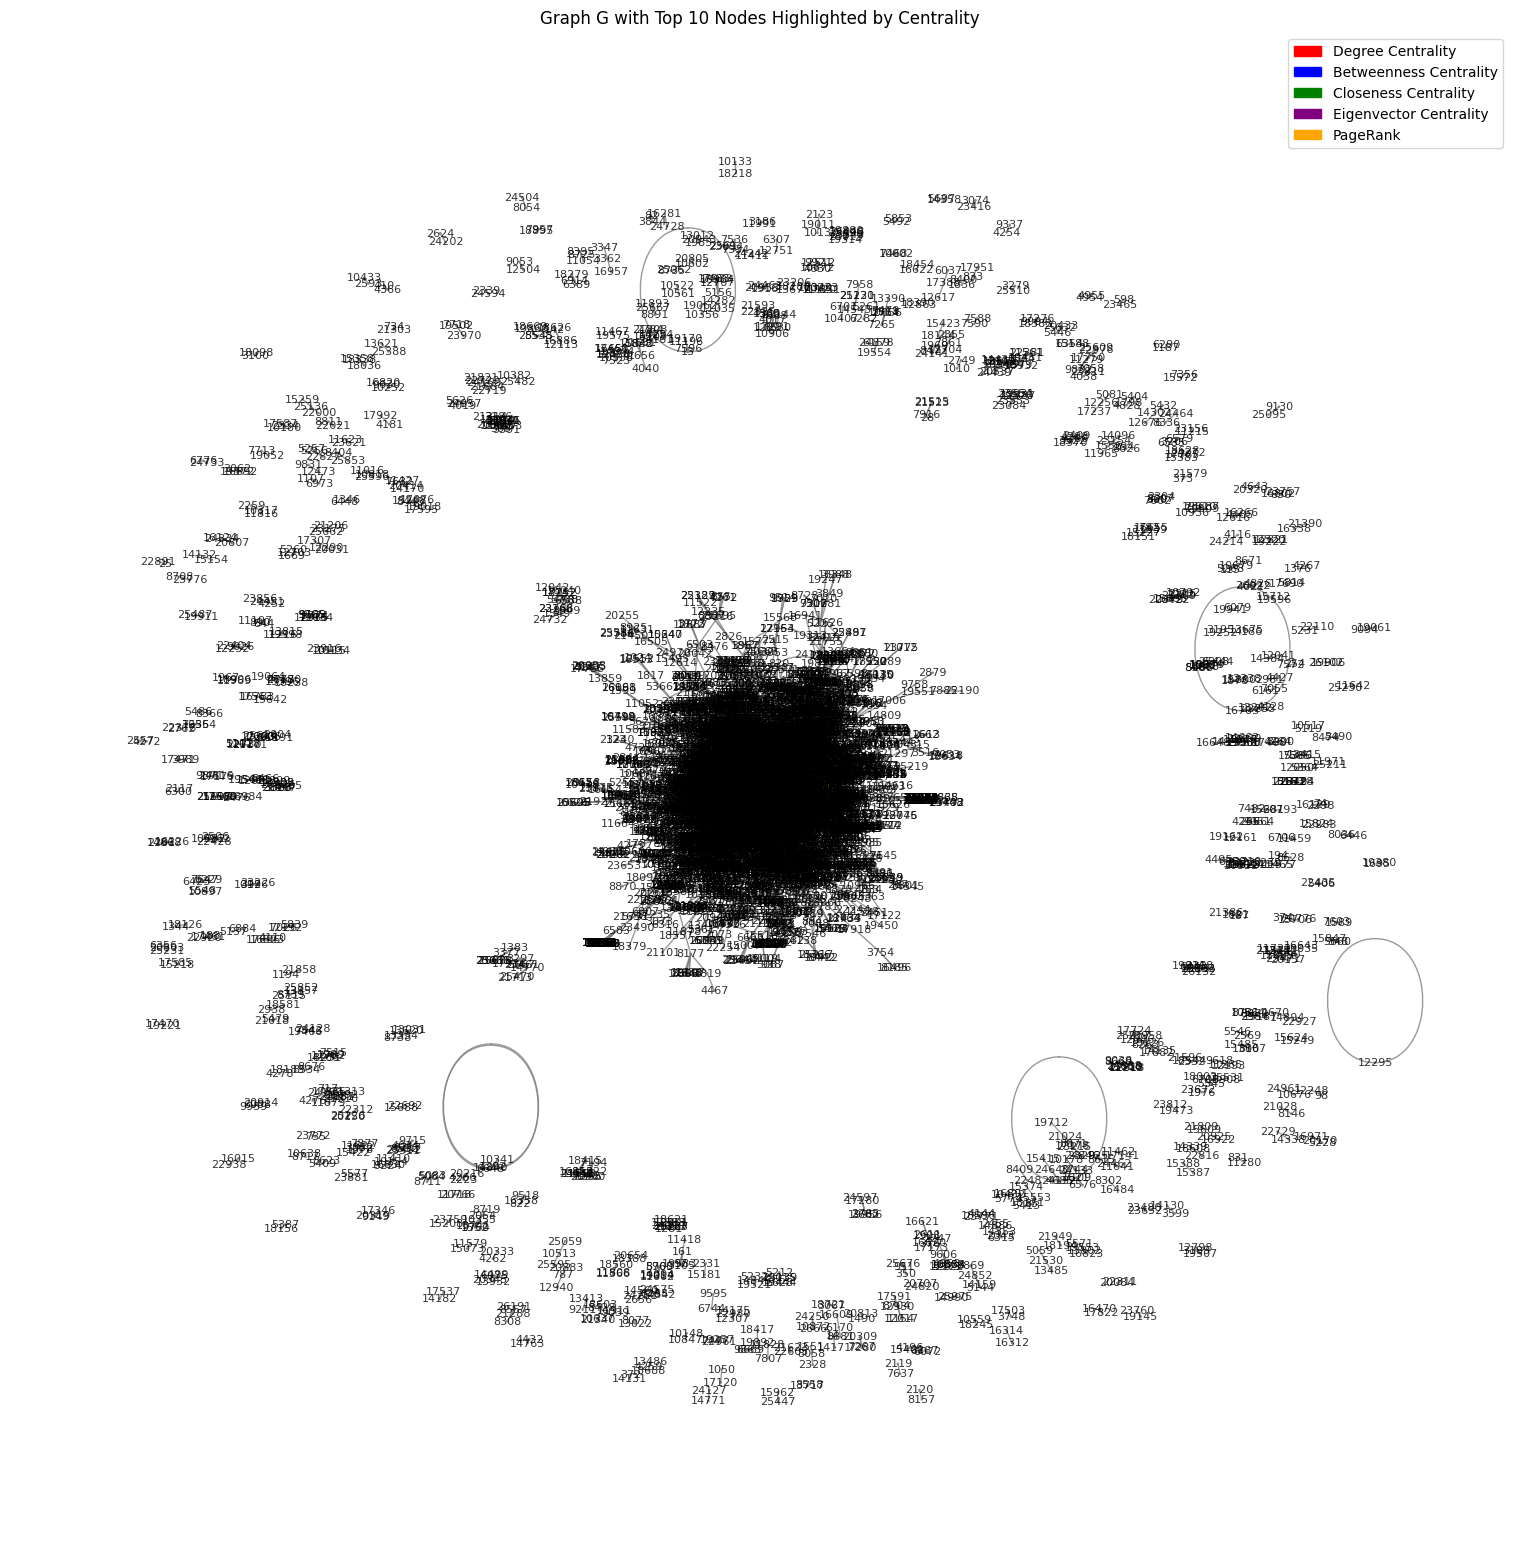

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import networkx as nx

# Bestimmen der Knoten mit den 10 kleinsten Rängen für jede Zentralität
top_nodes = {
    'Degree Centrality': centrality_df.nsmallest(10, 'Degree Centrality Rank')['Node'].tolist(),
    'Betweenness Centrality': centrality_df.nsmallest(10, 'Betweenness Centrality Rank')['Node'].tolist(),
    'Closeness Centrality': centrality_df.nsmallest(10, 'Closeness Centrality Rank')['Node'].tolist(),
    'Eigenvector Centrality': centrality_df.nsmallest(10, 'Eigenvector Centrality Rank')['Node'].tolist(),
    'PageRank': centrality_df.nsmallest(10, 'PageRank Rank')['Node'].tolist(),
}

# Farben und Größen für jede Zentralität
colors = {
    'Degree Centrality': 'red',
    'Betweenness Centrality': 'blue',
    'Closeness Centrality': 'green',
    'Eigenvector Centrality': 'purple',
    'PageRank': 'orange',
}

sizes = {
    'Degree Centrality': 10,
    'Betweenness Centrality': 9,
    'Closeness Centrality': 8,
    'Eigenvector Centrality': 7,
    'PageRank': 6,
}

# Initialisieren der Knotenfarben und -größen
node_colors = ['grey'] * G.number_of_nodes()
node_sizes = [1] * G.number_of_nodes()

# Knoten einfärben und Größen zuweisen
for centrality, nodes in top_nodes.items():
    for node in nodes:
        idx = list(G.nodes).index(node)
        node_colors[idx] = colors[centrality]
        node_sizes[idx] = sizes[centrality] * 100  # Multiplikator für bessere Sichtbarkeit

# Graph zeichnen
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, edge_color='grey', font_size=8, alpha=0.8)
plt.title("Graph G with Top 10 Nodes Highlighted by Centrality")

# Legende erstellen
legend_handles = [mpatches.Patch(color=color, label=centrality) for centrality, color in colors.items()]
plt.legend(handles=legend_handles, loc='best')
plt.show()

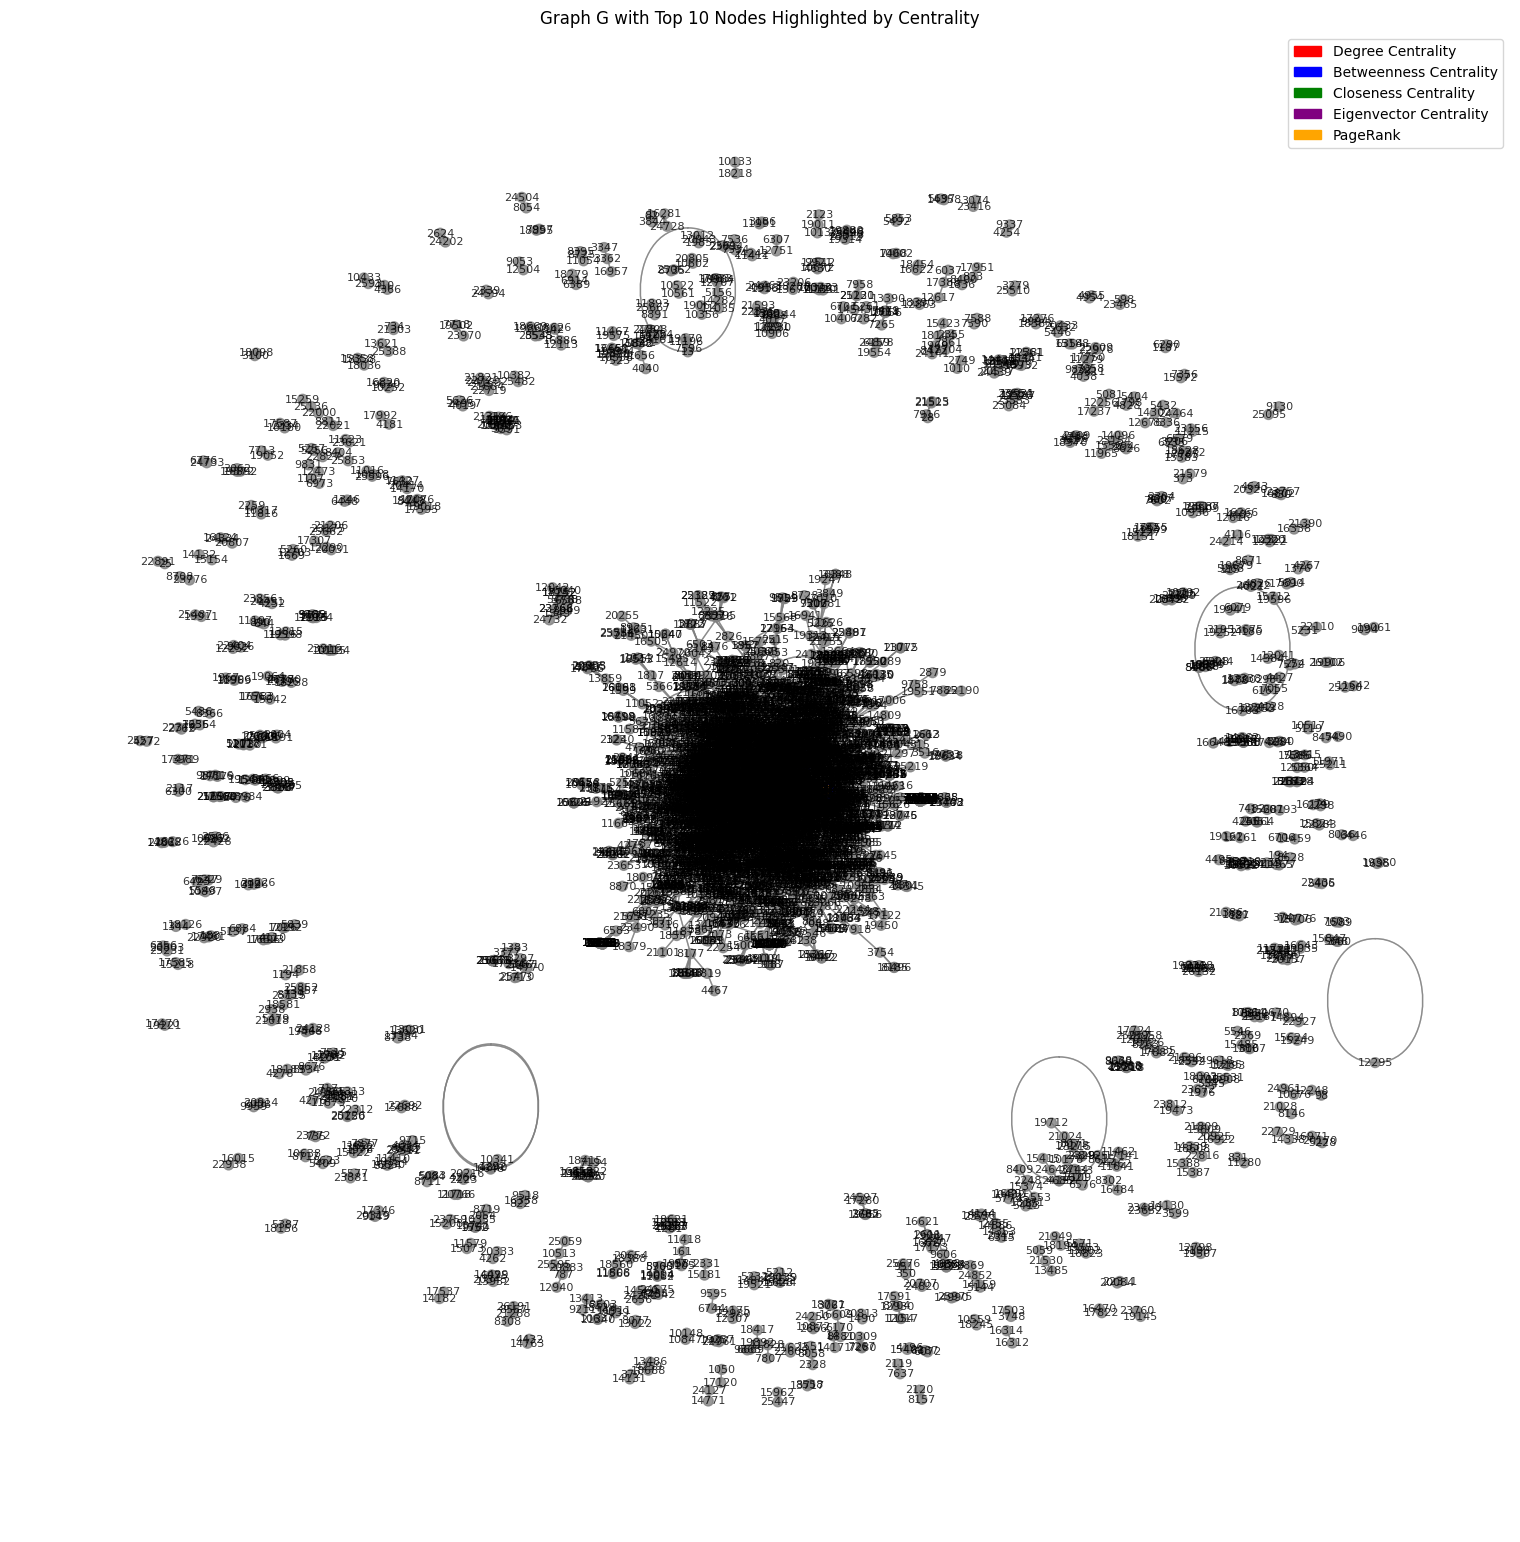

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import networkx as nx

# Bestimmen der Knoten mit den 10 kleinsten Rängen für jede Zentralität
top_nodes = {
    'Degree Centrality': centrality_df.nsmallest(10, 'Degree Centrality Rank')['Node'].tolist(),
    'Betweenness Centrality': centrality_df.nsmallest(10, 'Betweenness Centrality Rank')['Node'].tolist(),
    'Closeness Centrality': centrality_df.nsmallest(10, 'Closeness Centrality Rank')['Node'].tolist(),
    'Eigenvector Centrality': centrality_df.nsmallest(10, 'Eigenvector Centrality Rank')['Node'].tolist(),
    'PageRank': centrality_df.nsmallest(10, 'PageRank Rank')['Node'].tolist(),
}

# Farben für jede Zentralität
colors = {
    'Degree Centrality': 'red',
    'Betweenness Centrality': 'blue',
    'Closeness Centrality': 'green',
    'Eigenvector Centrality': 'purple',
    'PageRank': 'orange',
}

# Symbole für jede Zentralität
markers = {
    'Degree Centrality': 'o',  # Kreis
    'Betweenness Centrality': 's',  # Quadrat
    'Closeness Centrality': '^',  # Dreieck
    'Eigenvector Centrality': 'D',  # Diamant
    'PageRank': 'v',  # Umgekehrtes Dreieck
}

sizes = {
    'Degree Centrality': 12,
    'Betweenness Centrality': 11,
    'Closeness Centrality': 10,
    'Eigenvector Centrality': 9,
    'PageRank': 8,
}

# Scaler for better visability
scaler = 10

# Initialisieren der Knotenfarben und -formen
node_colors = ['grey'] * G.number_of_nodes()
node_shapes = ['o'] * G.number_of_nodes()
node_sizes = [5 * scaler] * G.number_of_nodes()

# Knoten einfärben und Formen zuweisen
for centrality, nodes in top_nodes.items():
    for node in nodes:
        idx = list(G.nodes).index(node)
        node_colors[idx] = colors[centrality]
        node_shapes[idx] = markers[centrality]
        node_sizes[idx] = sizes[centrality] * scaler  

# Graph zeichnen
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, seed=42)

nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, edge_color='grey', font_size=8, alpha=0.8)

nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='grey')

# Knoten manuell zeichnen
for centrality, nodes in top_nodes.items():
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors[centrality], node_shape=markers[centrality], node_size=sizes[centrality]*2*scaler, label=centrality, alpha=0.8)

#nx.draw_networkx_labels(G, pos, font_size=4)

plt.title("Graph G with Top 10 Nodes Highlighted by Centrality")

# Legende erstellen
legend_handles = [mpatches.Patch(color=color, label=centrality) for centrality, color in colors.items()]
plt.legend(handles=legend_handles, loc='best')
plt.show()

# Task 6 – Node Roles



In [16]:
def compute_raw_comm_u(graph, u, p=1, q=1):
    neighbors_u = set(graph.neighbors(u))
    raw_comm = 0.0
    
    for v in neighbors_u:
        neighbors_v = set(graph.neighbors(v))
        
        # Compute intersection and difference sizes
        common_neighbors = len(neighbors_u & neighbors_v)
        unique_neighbors = len(neighbors_u - (neighbors_v | {v}))
        
        # Compute tau_u(v)
        tau_uv = 1 / (1 + p * common_neighbors + (1 - q) * unique_neighbors)
        raw_comm += tau_uv
    
    return raw_comm

In [17]:
p = 1  # Parameter p
q = 1  # Parameter q

# Compute rawComm for all nodes
raw_comm_values = {u: compute_raw_comm_u(G, u, p, q) for u in G.nodes()}
print(raw_comm_values)

{3466: 3.75, 937: 2.333333333333333, 5233: 1.0, 8579: 2.6666666666666665, 10310: 9.333333333333332, 15931: 3.75, 17038: 6.2333333333333325, 18720: 1.0, 19607: 1.4166666666666665, 1854: 4.0, 4583: 2.0, 9572: 18.13968253968254, 10841: 5.0, 13056: 4.616666666666667, 14982: 1.0, 16310: 7.866666666666667, 19640: 5.571464646464645, 23855: 4.75, 24372: 1.0, 24814: 8.13809523809524, 5052: 13.766666666666667, 899: 1.3333333333333333, 1796: 1.0, 2287: 5.233333333333333, 3096: 4.2178571428571425, 3386: 2.9999999999999996, 4472: 3.0, 5346: 10.375000000000002, 5740: 1.0, 6094: 1.9999999999999998, 6376: 1.0, 9124: 9.908333333333335, 10235: 5.816666666666666, 10427: 3.0, 10597: 4.0, 15159: 1.75, 16148: 7.933333333333333, 16741: 3.0, 18235: 1.0, 18549: 1.0, 19297: 9.416666666666666, 20511: 5.660474716202269, 20595: 5.0, 20613: 3.7500000000000004, 24371: 6.693589743589743, 24559: 13.092857142857143, 24731: 1.0, 25102: 1.8666666666666665, 25271: 6.25, 25396: 3.3438080495356033, 1658: 1.9999999999999998,

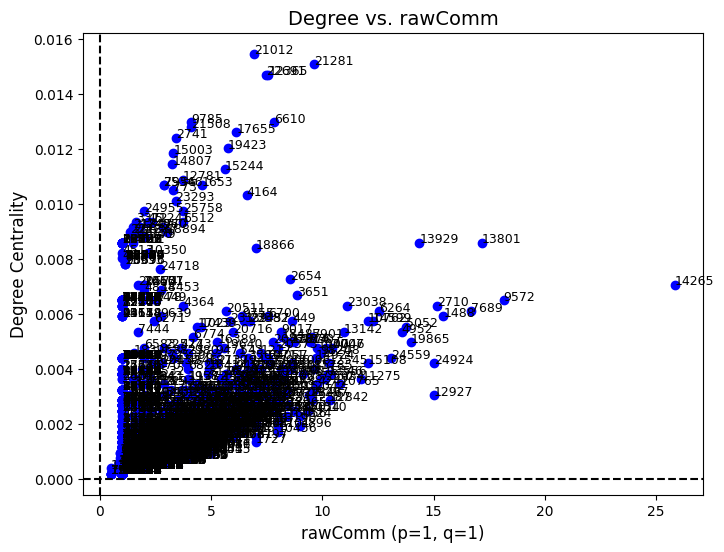

/root/documents/PorfolioExamDataMining/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


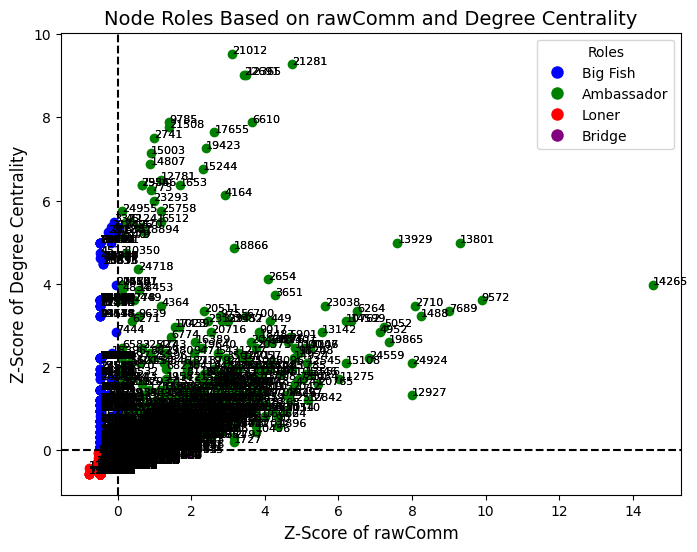

In [18]:
import numpy as np

# Compute scores
raw_comm_values = {u: compute_raw_comm_u(G, u, p, q) for u in G.nodes()}

degree_centrality = nx.degree_centrality(G)

# Extract values
rawComm_vals = list(raw_comm_values.values())
degree_vals = [degree_centrality[node] for node in G.nodes]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(rawComm_vals, degree_vals, color='blue')
for i, node in enumerate(G.nodes):
    plt.text(rawComm_vals[i], degree_vals[i], s=node, fontsize=9)

plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')
plt.xlabel(f"rawComm (p={p}, q={q})", fontsize=12)
plt.ylabel("Degree Centrality", fontsize=12)
plt.title("Degree vs. rawComm", fontsize=14)
plt.show()



import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from adjustText import adjust_text

rawComm_z = zscore(rawComm_vals)
degree_z = zscore(degree_vals)

# Classify nodes into roles
roles = {}
for i, node in enumerate(G.nodes):
    if degree_z[i] <= 0 and rawComm_z[i] <= 0:
        roles[node] = 'Loner'
    elif degree_z[i] >= 0 and rawComm_z[i] <= 0:
        roles[node] = 'Big Fish'
    elif degree_z[i] <= 0 and rawComm_z[i] >= 0:
        roles[node] = 'Bridge'
    elif degree_z[i] >= 0 and rawComm_z[i] >= 0:
        roles[node] = 'Ambassador'

# Plot the diagram
plt.figure(figsize=(8, 6))
colors = {'Big Fish': 'blue', 'Ambassador': 'green', 'Loner': 'red', 'Bridge': 'purple'}
texts = []
for i, node in enumerate(G.nodes):
    plt.scatter(rawComm_z[i], degree_z[i], color=colors[roles[node]], label=roles[node])
    plt.text(rawComm_z[i], degree_z[i], s=node, fontsize=8)
    texts.append(plt.text(rawComm_z[i], degree_z[i], s=node, fontsize=8))

# Add dividing lines
plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')

# Customize plot
plt.xlabel(xlabel="Z-Score of rawComm", fontsize=12)
plt.ylabel(ylabel="Z-Score of Degree Centrality", fontsize=12)
plt.title(label="Node Roles Based on rawComm and Degree Centrality", fontsize=14)

# Add legend
handles = [plt.Line2D(xdata=[0], ydata=[0], marker='o', color='w', label=role, markerfacecolor=color, markersize=10) 
           for role, color in colors.items()]
plt.legend(handles=handles, title="Roles")
# # Set axis limits
# plt.xlim(-4, 4)
# plt.ylim(-3, 3)
#adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()


<Figure size 800x600 with 0 Axes>

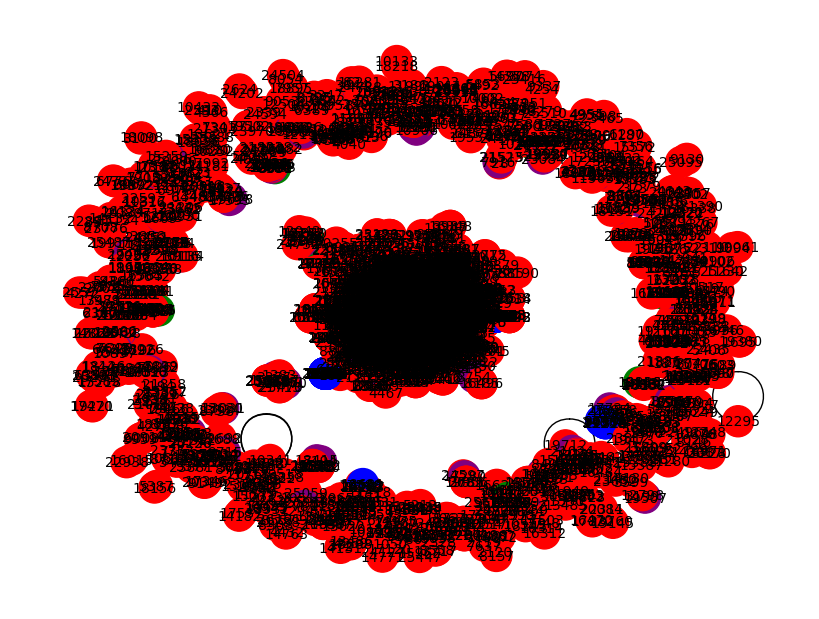

In [19]:
# Plot the diagram
plt.figure(figsize=(8, 6))
colors = {'Big Fish': 'blue', 'Ambassador': 'green', 'Loner': 'red', 'Bridge': 'purple'}


node_colors = [colors[roles[node]] for node in G.nodes()]
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, node_color=node_colors, with_labels=True, node_size=500, font_size=10)
plt.show()

In [20]:
quantiles = centrality_df['Degree Centrality'].quantile([0.75]).values[0]

print(quantiles)

0.0011448196908986834


In [21]:
dd

NameError: name 'dd' is not defined

Role
Regular       362
Big Fish      325
Loner         250
Bridge        196
Ambassador    110
Influencer     70
Name: count, dtype: int64


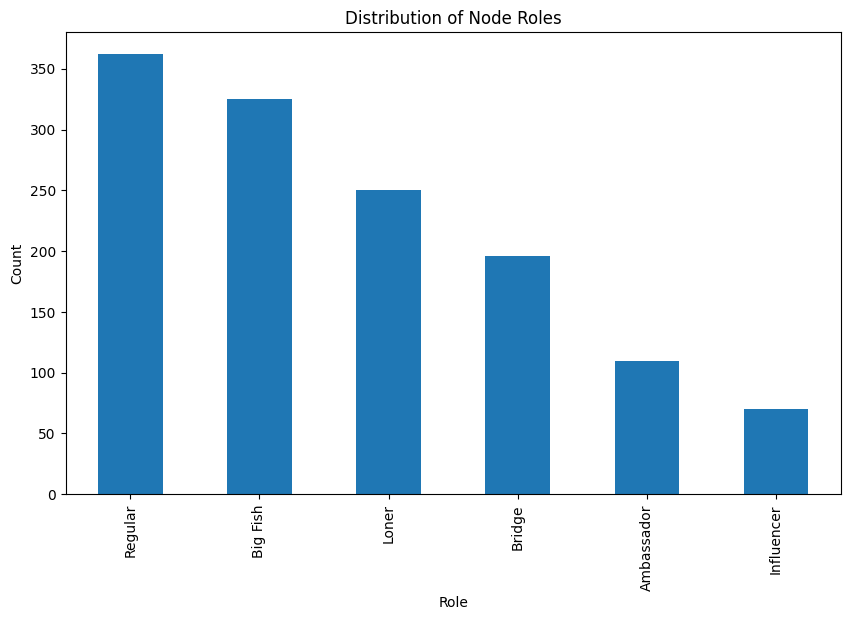

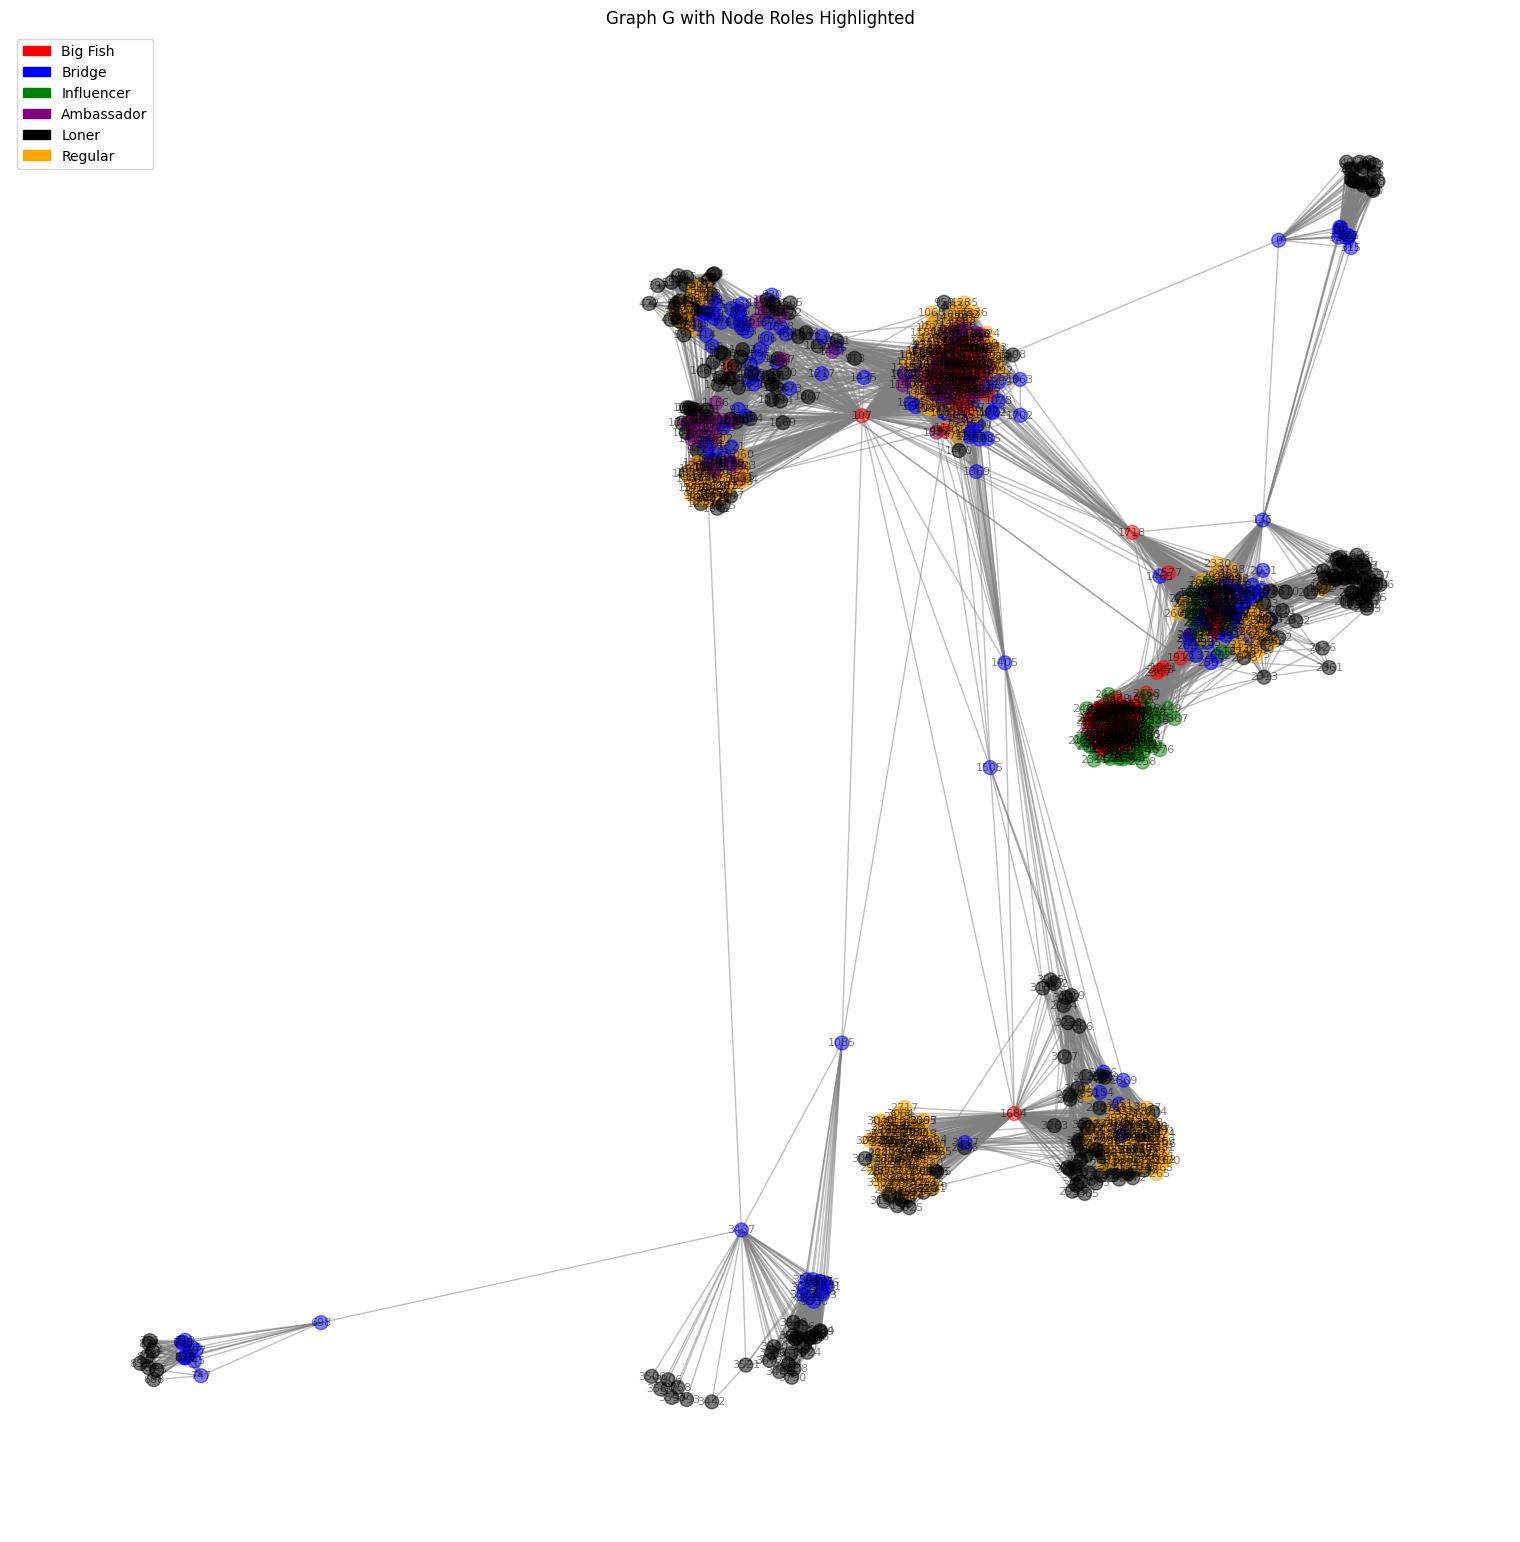

In [27]:
import pandas as pd
import networkx as nx



# Rollen zuweisen basierend auf den Zentralitäten
def assign_role(row):


    if row['Degree Centrality'] > centrality_df['Degree Centrality'].quantile([0.75]).values[0]:
        return 'Big Fish'
    elif row['Betweenness Centrality'] > centrality_df['Betweenness Centrality'].quantile([0.75]).values[0]:
        return 'Bridge'
    elif row['Eigenvector Centrality'] > centrality_df['Eigenvector Centrality'].quantile([0.75]).values[0]:
        return 'Influencer'
    elif row['Closeness Centrality'] > centrality_df['Closeness Centrality'].quantile([0.75]).values[0]:
        return 'Ambassador'
    elif row['Degree Centrality'] < centrality_df['Degree Centrality'].quantile([0.25]).values[0]:
        return 'Loner'
    else:
        return 'Regular'

centrality_df['Role'] = centrality_df.apply(assign_role, axis=1)

# Rollen analysieren
role_counts = centrality_df['Role'].value_counts()
print(role_counts)

# Rollen visualisieren
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
role_counts.plot(kind='bar')
plt.title('Distribution of Node Roles')
plt.xlabel('Role')
plt.ylabel('Count')
plt.show()

# Rollen im Graphen visualisieren
role_colors = {
    'Big Fish': 'red',
    'Bridge': 'blue',
    'Influencer': 'green',
    'Ambassador': 'purple',
    'Loner': 'black',
    'Regular': 'orange'
}

node_colors = [role_colors[role] for role in centrality_df['Role']]

plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=100, edge_color='grey', font_size=8, alpha=0.5)
plt.title("Graph G with Node Roles Highlighted")

# Legende erstellen
legend_handles = [mpatches.Patch(color=color, label=role) for role, color in role_colors.items()]
plt.legend(handles=legend_handles, loc='best')

plt.show()

# Task 7 – Community Discovery

Explaination:

**Girvan Newman Algorithm**


**Louvain Algorithm:**



In [ ]:
def plot_cluster(G, clusters):


    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    # Knotenfarben basierend auf den Clustern zuweisen
    node_colors = []
    for node in G.nodes():
        for i, cluster in enumerate(clusters):
            if node in cluster:
                node_colors.append(colors[i % len(colors)])

    # Netzwerk zeichnen
    plt.figure(figsize=(15, 15))
    pos = nx.spring_layout(G, seed=seed)
    fig = nx.draw(G, pos, node_color=node_colors, with_labels=True, node_size=100, font_size=8)
    plt.show()
    return None

In [ ]:
girvan_newman = nx.algorithms.community.centrality.girvan_newman(G)
j = 2
for i, communities in enumerate(girvan_newman):
    if i == j:
        print('Communities:', len(communities))
        print(tuple(sorted(c) for c in communities))
        gn_clusters = tuple(set(sorted(c)) for c in communities)


print(gn_clusters)
plot_cluster(G, gn_clusters)

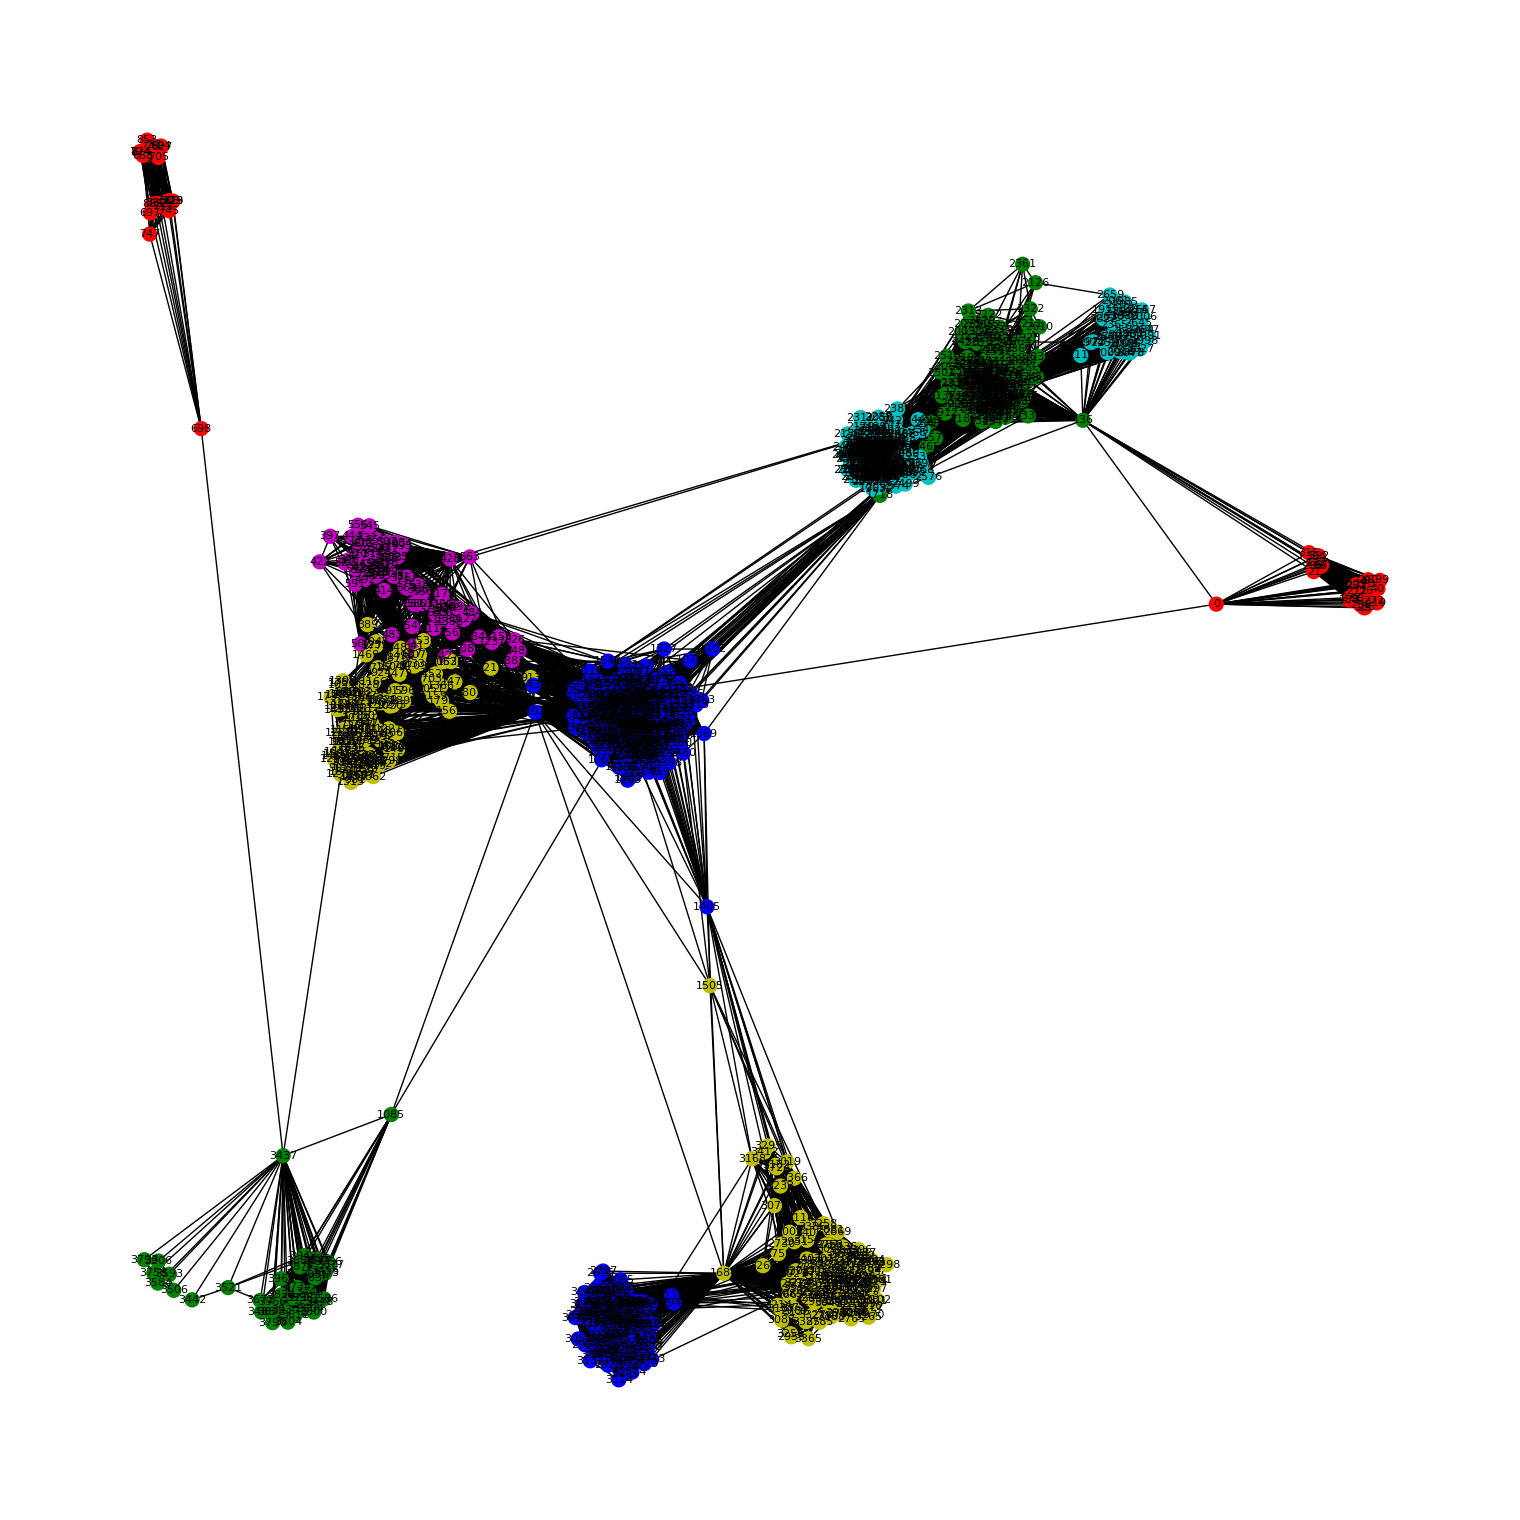

In [ ]:
louvain_cluster = nx.algorithms.community.louvain_communities(G, seed=42)
plot_cluster(G, louvain_cluster)

# Task 8 – Conclusions and Future Work